### HAR 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

featuer_name_df = pd.read_csv(url, sep='\s+', 
                               # \s+ : 한개 이상의 띄어쓰기로 구분되어져 있다
                               header = None,
                               # header = : 인덱스를 이용하여 header 설정, none 시 없음
                               names = ['column_index', 'column_name'])
                               # name =[] : 불러올 때 칼럼 이름을 지정한 이름으로 변경
featuer_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
featuer_name = featuer_name_df.iloc[:, 1].values.tolist()
                                           # values : 값들만 추출
                                           # tolist() : 리스트로 변환
featuer_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [4]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header = None)
X_test = pd.read_csv(X_test_url, sep='\s+', header = None)

X_train.columns = featuer_name
X_test.columns = featuer_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header = None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header = None, names=['action'])
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### get_pca_data 함수를 통한 PCA 처리

In [9]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components = 2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [10]:
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pca, pca 

(array([[-5.5202803 , -0.29027752],
        [-5.53534954, -0.08253025],
        [-5.47498801,  0.28738705],
        ...,
        [ 5.85750527, -3.08184349],
        [ 5.42109482, -3.42643018],
        [ 5.49797027, -2.78992872]]),
 PCA(n_components=2))

In [11]:
HAR_pca.shape

(7352, 2)

In [12]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

### PCA 데이터 프레임

In [15]:
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [16]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(col_num)]
    return pd.DataFrame(pca_data, columns=cols)

In [17]:
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,action
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


### pairplot로 PCA 확인

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


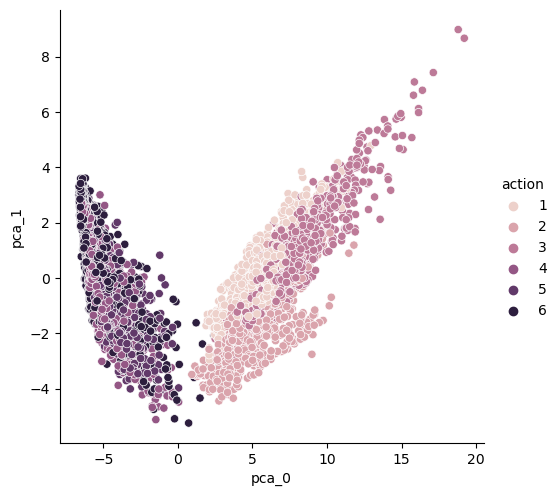

In [19]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue='action', height=5,
             x_vars=['pca_0'], y_vars=['pca_1'])

### 성능 확인

In [20]:
import numpy as np

def print_variance_ration(pca):
    print('variance_ration : ', pca.explained_variance_ratio_)
    print('sum of variance_ration : ', np.sum(pca.explained_variance_ratio_))

print_variance_ration(pca)

variance_ration :  [0.6255444  0.04913023]
sum of variance_ration :  0.6746746270487948


### 컴포넌트 3개 설정(components = 3)

In [21]:
HAR_pca, pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290278,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5


In [22]:
print_variance_ration(pca)

variance_ration :  [0.6255444  0.04913023 0.04121467]
sum of variance_ration :  0.7158893015785962


### 컴포넌트 10개 설정(components = 10)

In [23]:
HAR_pca, pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train

print_variance_ration(pca)

variance_ration :  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969379 0.00858016]
sum of variance_ration :  0.8050386819141446


### PCA 데이터 RandomForest 적용

### RandomForest 
- max_depth : DecisionTree의 가지의 수
- n_estimators : 사용한 DecisionTree 수
- min_samples_leaf : max_depth가 한계치에 오지 않았지만 분할해서 leaf가 될 수 있는 최소 샘플수를 지정하는 것
- min_samples_split : leaf에서 가지로 분할 할 수 있는 샘플수를 지정하는 것

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
# n_jobs : 학습 시 사용할 CPU의 코어 개수, -1은 CPU의 코어 전부 사용
grid_cv = GridSearchCV(estimator=rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [25]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [26]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [27]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score', ascending=True).head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
35,1,0.837867,200,10
32,1,0.837867,200,10
14,3,0.837595,200,8
17,3,0.837595,200,8
23,5,0.837187,200,8


In [28]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 200}

In [29]:
grid_cv.best_score_

0.8378672470076169

In [30]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=200, n_jobs=-1, random_state=13)

### 테스트 데이터 적용

In [33]:
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1, ))

pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8547675602307431

### XGBoost 적용

### XGBoost 주요 파라미터
- nthread : CPU의 실행 스레드 개수를 조정, 디폴트는 CPU 전체 스레드 사용
- eta : GBM 학습률
- num_boost_rounds : n_estimators와 같은 기능
- max_depth
- y_train, y_test 대신 y_train - 1, y_test -1 지정 :  레이블이 0부터 시작해야 하는데 1부터 시작해서 생기는 문제해결을 위한 설정

### 조기 종료 조건과 검증 데이터 지정
- early_stopping_rounds = ? : 같은 성능으로 ?번 이상 반복해서 비슷한 성능이 나오면 종료
- eval_set : 검증set

In [35]:
import time
from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test-1)]
# 원래는 종료조건을 걸기 위해서는 validation data를 넣어줘야되지만 따로 만들지 않고 test data로 대체하여 사용

start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(HAR_pca, y_train.values.reshape(-1,)-1, early_stopping_rounds = 10, eval_set = evals)
# sklean 모듈은 판다스 자료들을 잘 받아와 연동도 잘되지만 xgboost 모듈은 numpy array형태로 넣어줘야 하므로 .values로 변환해줘야 된다

print('Fit time :', time.time() - start_time)

[0]	validation_0-mlogloss:1.61495
[1]	validation_0-mlogloss:1.47646
[2]	validation_0-mlogloss:1.35908
[3]	validation_0-mlogloss:1.26398
[4]	validation_0-mlogloss:1.18100
[5]	validation_0-mlogloss:1.11065
[6]	validation_0-mlogloss:1.04689
[7]	validation_0-mlogloss:0.98990


[8]	validation_0-mlogloss:0.94015
[9]	validation_0-mlogloss:0.89308
[10]	validation_0-mlogloss:0.85253
[11]	validation_0-mlogloss:0.81650
[12]	validation_0-mlogloss:0.78382
[13]	validation_0-mlogloss:0.75244
[14]	validation_0-mlogloss:0.72599
[15]	validation_0-mlogloss:0.70082
[16]	validation_0-mlogloss:0.67841
[17]	validation_0-mlogloss:0.65868
[18]	validation_0-mlogloss:0.64060
[19]	validation_0-mlogloss:0.62223
[20]	validation_0-mlogloss:0.60633
[21]	validation_0-mlogloss:0.59106
[22]	validation_0-mlogloss:0.57725
[23]	validation_0-mlogloss:0.56392
[24]	validation_0-mlogloss:0.55056
[25]	validation_0-mlogloss:0.53982
[26]	validation_0-mlogloss:0.52910
[27]	validation_0-mlogloss:0.51932
[28]	validation_0-mlogloss:0.50912
[29]	validation_0-mlogloss:0.50098
[30]	validation_0-mlogloss:0.49244
[31]	validation_0-mlogloss:0.48427
[32]	validation_0-mlogloss:0.47658
[33]	validation_0-mlogloss:0.47017
[34]	validation_0-mlogloss:0.46401


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-mlogloss:0.45721
[36]	validation_0-mlogloss:0.45185
[37]	validation_0-mlogloss:0.44649
[38]	validation_0-mlogloss:0.44171
[39]	validation_0-mlogloss:0.43718
[40]	validation_0-mlogloss:0.43199
[41]	validation_0-mlogloss:0.42793
[42]	validation_0-mlogloss:0.42430
[43]	validation_0-mlogloss:0.42028
[44]	validation_0-mlogloss:0.41578
[45]	validation_0-mlogloss:0.41214
[46]	validation_0-mlogloss:0.40836
[47]	validation_0-mlogloss:0.40527
[48]	validation_0-mlogloss:0.40150
[49]	validation_0-mlogloss:0.39791
[50]	validation_0-mlogloss:0.39505
[51]	validation_0-mlogloss:0.39241
[52]	validation_0-mlogloss:0.39060
[53]	validation_0-mlogloss:0.38775
[54]	validation_0-mlogloss:0.38532
[55]	validation_0-mlogloss:0.38339
[56]	validation_0-mlogloss:0.38096
[57]	validation_0-mlogloss:0.37884
[58]	validation_0-mlogloss:0.37726
[59]	validation_0-mlogloss:0.37515
[60]	validation_0-mlogloss:0.37324
[61]	validation_0-mlogloss:0.37116
[62]	validation_0-mlogloss:0.36915
[63]	validation_0-ml

In [36]:
accuracy_score(y_test-1, xgb.predict(pca.transform(X_test)))

0.8632507634882932